Import Libraries and Load Dataset

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

data = load_wine()
X = data.data
y = data.target
class_labels = np.unique(y)

Mean

In [8]:
mean_overall = np.mean(X, axis=0)

# mean features by class
mean_vectors = []
for cl in class_labels:
    mean_vectors.append(np.mean(X[y == cl], axis=0))

 Within-class covariance matrix

In [9]:
Sw = np.zeros((X.shape[1], X.shape[1]))
for cl, mv in zip(class_labels, mean_vectors):
    class_scatter = np.zeros((X.shape[1], X.shape[1]))
    for row in X[y == cl]:
        row, mv = row.reshape(-1, 1), mv.reshape(-1, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    Sw += class_scatter

Between-class covariance matrix

In [10]:
Sb = np.zeros((X.shape[1], X.shape[1]))
for i, mean_vec in enumerate(mean_vectors):
    n = X[y == i, :].shape[0]
    mean_vec = mean_vec.reshape(-1, 1)
    mean_overall_vec = mean_overall.reshape(-1, 1)
    Sb += n * (mean_vec - mean_overall_vec).dot((mean_vec - mean_overall_vec).T)

Eigenvalues and Eigenvectors   

In [11]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(Sw).dot(Sb))  # use pseudo-inverse for stability

eig_vals = eig_vals.real
eig_vecs = eig_vecs.real

# Sort eigenvectors by eigenvalues (high-->low)
eig_pairs = [(eig_vals[i], eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

W = np.hstack([eig_pairs[i][1].reshape(-1, 1) for i in range(len(class_labels) - 1)])

Projection of Data

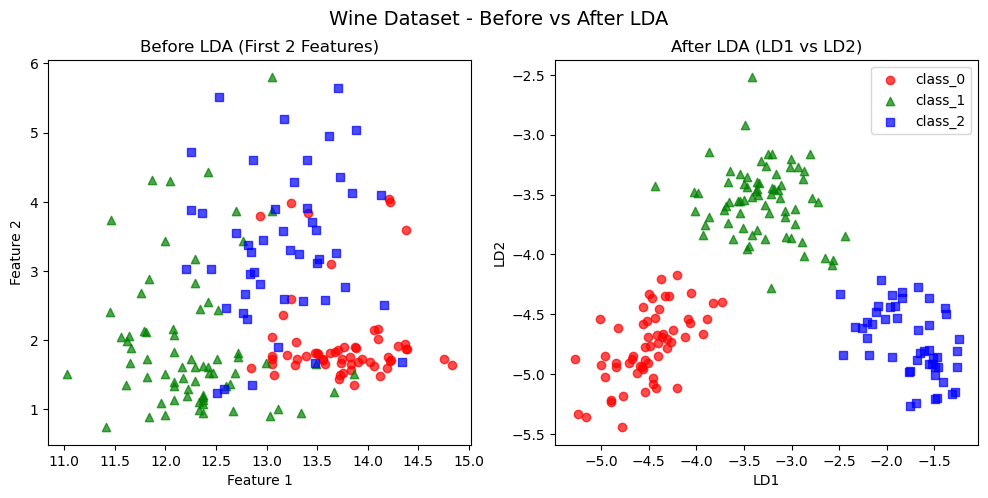

In [14]:
X_lda = X.dot(W)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before LDA 
for label, marker, color in zip(class_labels, ('o', '^', 's'), ('r', 'g', 'b')):
    axes[0].scatter(X[y == label, 0], X[y == label, 1],
                    marker=marker, color=color, alpha=0.7, label=data.target_names[label])
axes[0].set_title("Before LDA (First 2 Features)")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# After LDA (2D)
for label, marker, color in zip(class_labels, ('o', '^', 's'), ('r', 'g', 'b')):
    axes[1].scatter(X_lda[y == label, 0], X_lda[y == label, 1],
                    marker=marker, color=color, alpha=0.7, label=data.target_names[label])
axes[1].set_title("After LDA (LD1 vs LD2)")
axes[1].set_xlabel("LD1")
axes[1].set_ylabel("LD2")

plt.legend(loc="best")
plt.suptitle("Wine Dataset - Before vs After LDA", fontsize=14)
plt.show()